<a href="https://colab.research.google.com/github/Megadeath0101/ENGG03-METODOS-NMRL/blob/main/ENGG03_Aula_Interpola%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolação de dados
A interpolação de dados é uma técnica usada para estimar valores desconhecidos dentro de um intervalo de dados conhecidos.

Em outras palavras, a interpolação envolve o uso de um conjunto de dados conhecidos para estimar valores para dados não são conhecidos, mas que ainda estão dentro do domínio dos dados conhecidos.

Vamos pegar um exemplo de um ensaio experimental sobre a deflexão de uma viga de concreto, representado nesses dados:

| Cargas (kN) | Deflexões (mm) |
|--------|-----------|
| 0      | 0.06  |
| 10     | 1.03|
| 20     | 2.30|
| 30     | 3.94|
| 40     | 6.28|
| 50     | 8.90|

Observe na tabela que o experimento foi conduzido com um intervalo de carga 10 kN. Com isso, podemos dizer que só é conhecido o valor de deflexão para as cargas apresentadas na tabela.

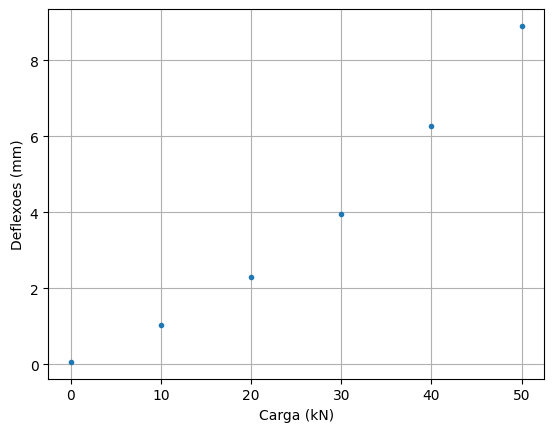

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargas em kN
cargas = np.array([0, 10, 20, 30, 40, 50])

# Deflexões em mm
deflexoes = np.array([0.06, 1.03, 2.30, 3.94, 6.28, 8.90])

# Exibindo os dados
plt.plot(cargas,deflexoes,'.')
plt.xlabel('Carga (kN)')
plt.ylabel('Deflexoes (mm)')
plt.grid(True)

No entanto, se precisarmos saber qual o valor da defelxão para uma carga de 15kN esse valor não existe na tabela.

Intuitivamente, sabemos que o valor de defelxão para uma carga de 15kN está entre 1.03mm e 2.30mm, deflexões correpondentes às cargas de 10kN e 20kN. Assim fazemos:

\begin{align}
\begin{matrix}
10 & - & 1.03\\
15 & - & y\\
20 & - & 2.30
\end{matrix}
\end{align}

Resolvendo
\begin{align}
\frac{15 - 10}{20 - 10} &= \frac{y - 1.03}{2.30 - 1.03}\\
\frac{5}{10} &= \frac{y - 1.03}{0.97}\\
0.97\cdot \frac{5}{10} + 1.03 & = y\\
y &= 1.51\text{mm}
\end{align}

Logo, se escolhermos um valor qualquer de carga $x_{i-1}\leq x \leq x_{i+1}$, o valor correspondente de deflexão $y$ é dado por

\begin{align}
\begin{matrix}
x_{i-1} & - & y_{i-1}\\
x & - & y\\
x_{i+1} & - & y_{i+1}
\end{matrix}
\end{align}
Resolvendo,
\begin{align}
\frac{x - x_{i-1}}{x_{i+1} - x_{i-1}} &= \frac{y - y_{i-1}}{y_{i+1} - y_{i-1}}\\
 \frac{x - x_{i-1}}{x_{i+1} - x_{i-1}}(y_{i+1} - y_{i-1}) &= y - y_{i-1}\\
y &= \frac{x - x_{i-1}}{x_{i+1} - x_{i-1}}(y_{i+1} - y_{i-1}) + y_{i-1}\\
y &= \frac{y_{i+1} - y_{i-1}}{x_{i+1} - x_{i-1}}x + y_{i-1} - \frac{y_{i+1} - y_{i-1}}{x_{i+1} - x_{i-1}}x_{i-1}
\end{align}

Note que, a equação encontrada representa uma reta que passa pelos pontos $(x_{i-1},y_{i-1})$ e $(x_{i+1},y_{i+1})$. Logo, dado um valor qualquer de $x$, podemos ajustar uma reta que ligas os pontos antecessor e sucessor, e assim determinar o valor faltante. A essa interpolação dá-se o nome de interpolação linear.

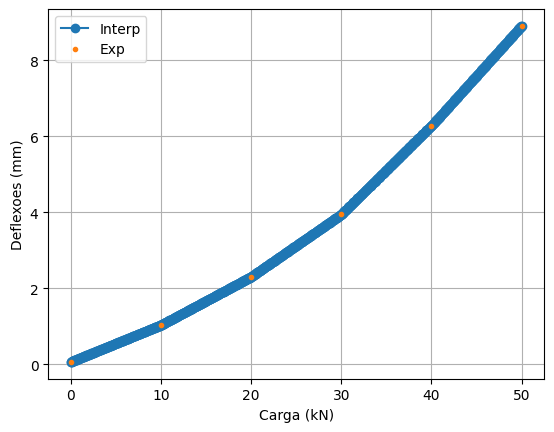

In [ ]:
#@title Usando biblioteca do python
from scipy.interpolate import interp1d # Carregando biblioteca

# Gerando valores de cargas, fora da tabela, para interpolar
cargas_novas = np.linspace(0,50,1001)

# Criando a função de interpolação
funcao_interp = interp1d(cargas,deflexoes, kind='linear')

# Calculando os valores interpolados
deflexoes_interpoladas = funcao_interp(cargas_novas)

# Construindo os gráficos
plt.plot(cargas_novas,deflexoes_interpoladas,'o-')
plt.plot(cargas,deflexoes,'.')
plt.xlabel('Carga (kN)')
plt.ylabel('Deflexoes (mm)')
plt.legend(['Interp','Exp'])
plt.grid(True)

## Tipos de interpolação
Além da interpolação linear, usada anteriormente, existem muitos métodos de interpolação disponíveis, sendo os mais comuns:

* A interpolação polinomial envolve o ajuste de um polinômio aos pontos de dados. Este método pode ser muito preciso se os dados seguirem uma tendência polinomial, mas pode ser propenso a oscilações excessivas, especialmente com conjuntos de dados maiores.
* A interpolação spline envolve o ajuste de uma série de polinômios de baixo grau a pequenos subconjuntos de pontos de dados. Este método pode fornecer uma boa precisão e suavidade, especialmente para dados que têm muitas oscilações.
* A interpolação de vizinho mais próximo envolve a seleção do valor do ponto de dados mais próximo ao local desconhecido. Este método é simples e rápido, mas pode não ser preciso se os dados variarem rapidamente.

In [ ]:
#@title Comparando os métodos de interpolação
import plotly.graph_objects as go # Biblioteca gráfica

# Linear, vizinho mais próximo, spline quadrática
tipos = ['linear', 'nearest', 'quadratic']
fig = go.Figure()

for tipo in tipos:
    # Criando a função de interpolação
    funcao_interp = interp1d(cargas, deflexoes, kind=tipo)
    deflexoes_interpoladas = funcao_interp(cargas_novas)

    fig.add_trace(go.Scatter(x=cargas_novas, y=deflexoes_interpoladas, mode='lines+markers', name=tipo))

# Adicionando os dados experimentais
fig.add_trace(go.Scatter(x=cargas, y=deflexoes, mode='markers', name='exp'))

# Configurando os eixos
fig.update_layout(
    xaxis_title="Carga (kN)",
    yaxis_title="Deflexões (mm)",
    legend_title="Tipos de Interpolação")
fig.show()
